In [1]:
filepath = "/Users/aliaksandrilyukevich/Library/CloudStorage/OneDrive-King'sCollegeLondon/Applied Data Science/Analytic Tools for Data Science/6/Iris.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv(filepath)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [11]:
'''
SUPERVISED MACHINE LEARNING

    CLASSIFIERS
        Step 1 - Get Data
        Step 2 - Explore and Clean Data
        Step 3 - Prepare Data: Feature and Target
        Step 4 - Train Model
        Step 5 - Run Model
'''
FEATURE_1 = 'sepal.length'
FEATURE_2 = 'sepal.width'
FEATURE_3 = 'petal.length'
FEATURE_4 = 'petal.width'

TARGET = 'variety'


In [12]:

'''
KNN
'''
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

N_NEIGHBORS = int(input())

In [13]:
knn = KNeighborsClassifier(n_neighbors=N_NEIGHBORS)
CV = int(input())

In [14]:
def find_best_k_parameter(df: pd.DataFrame) -> plt:

    feature_df = df[[FEATURE_1, FEATURE_2, FEATURE_3, FEATURE_4]]
    target_df = df[[TARGET]]
    
    X = feature_df
    y = target_df
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=22)

    k_range = range(1,26)
    scores = []

    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, np.ravel(y_train))
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        scores.append(accuracy)
    
    plt.plot(k_range, scores)
    plt.xlabel("k values for KNN")
    plt.ylabel("Accuracy scores")
    plot = plt.show()

    return plot

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

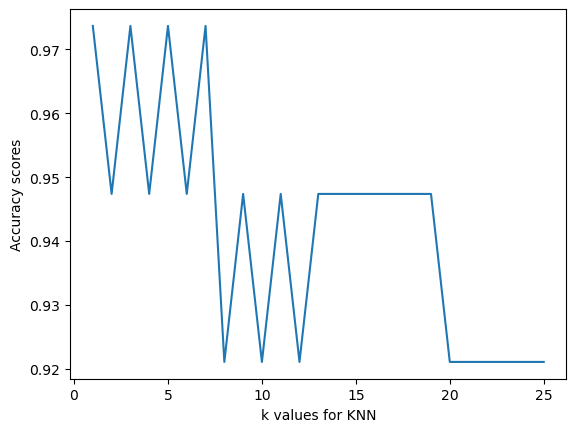

In [15]:
plot = find_best_k_parameter(df=df)
plot

In [16]:
def train_knn_model(df: pd.DataFrame) -> float:

    feature_df = df[[FEATURE_1, FEATURE_2, FEATURE_3, FEATURE_4]]
    target_df = df[[TARGET]]
    
    X = feature_df
    y = target_df

    cross_validation = cross_validate(knn, X, y, cv=CV)
    mean_score = cross_validation['test_score'].mean()

    print(mean_score)

In [17]:
mean_score = train_knn_model(df=df)
mean_score 

0.9666666666666666


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

In [18]:
def train_knn_model_with_for_loop(df: pd.DataFrame) -> list:

    feature_df = df[[FEATURE_1, FEATURE_2, FEATURE_3, FEATURE_4]]
    target_df = df[[TARGET]]
    
    X = feature_df
    y = target_df

    for i in range(2,20):
        cross_validation = cross_validate(knn, X, y, cv=i)
        mean_score = cross_validation['test_score'].mean()
        
        print(mean_score)

In [19]:
mean_score = train_knn_model_with_for_loop(df=df)
mean_score

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

0.94
0.9733333333333333
0.9599928876244666
0.9666666666666668
0.9666666666666667
0.9669140383426098
0.9671052631578947
0.960375816993464
0.9666666666666666
0.9605394605394605
0.9674145299145299


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode

0.9673659673659672
0.9610389610389609
0.9600000000000001
0.9666666666666666
0.9673202614379084
0.9591049382716049
0.9605263157894737


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

In [20]:
FEATURE_1_FOR_PREDICTION=4.8
FEATURE_2_FOR_PREDICTION=3.1
FEATURE_3_FOR_PREDICTION=1.47
FEATURE_4_FOR_PREDICTION=0.16

In [24]:
feature_df = df[[FEATURE_1, FEATURE_2, FEATURE_3, FEATURE_4]]
target_df = df[[TARGET]]

X = feature_df
y = target_df


In [25]:
knn.fit(X,y)
knn.predict([[
        FEATURE_1_FOR_PREDICTION,
        FEATURE_2_FOR_PREDICTION,
        FEATURE_3_FOR_PREDICTION,
        FEATURE_4_FOR_PREDICTION,
        ]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['Setosa'], dtype=object)